In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50V2 as ResNet # Resnet50v2 is computationally more efficient and stable than Resnet
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.metrics import Precision, Recall, AUC

In [2]:
data_gen = ImageDataGenerator(rescale=1/255)
train_data_generator = data_gen.flow_from_directory(
    "c:/users/saini/onedrive/documents/masters/first semester/machine learning/datasets/fer2013/train",
    target_size=(48, 48),
    batch_size = 64,
    class_mode = 'categorical'
)
test_data_generator = data_gen.flow_from_directory(
    "c:/users/saini/onedrive/documents/masters/first semester/machine learning/datasets/fer2013/test",
    target_size=(48, 48),
    batch_size = 64,
    class_mode = 'categorical'
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [3]:
base_model = ResNet(include_top=False, weights='imagenet', input_shape=(48, 48, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

predictions = Dense(7, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')])



In [4]:
result = model.fit(train_data_generator, epochs=10, validation_data=test_data_generator, callbacks=[early_stopping])

Epoch 1/10
449/449 [==============================] - 312s 694ms/step - loss: 1.8213 - accuracy: 0.3245 - precision: 0.4502 - recall: 0.0844 - auc: 0.7108 - val_loss: 1.5958 - val_accuracy: 0.3833 - val_precision: 0.6688 - val_recall: 0.0892 - val_auc: 0.7647
Epoch 2/10
449/449 [==============================] - 301s 670ms/step - loss: 1.6033 - accuracy: 0.3767 - precision: 0.6050 - recall: 0.1178 - auc: 0.7633 - val_loss: 1.5661 - val_accuracy: 0.3972 - val_precision: 0.6664 - val_recall: 0.1383 - val_auc: 0.7741
Epoch 3/10
449/449 [==============================] - 295s 658ms/step - loss: 1.5499 - accuracy: 0.3989 - precision: 0.6239 - recall: 0.1456 - auc: 0.7814 - val_loss: 1.5421 - val_accuracy: 0.4021 - val_precision: 0.6799 - val_recall: 0.1287 - val_auc: 0.7845
Epoch 4/10
449/449 [==============================] - 239s 533ms/step - loss: 1.5114 - accuracy: 0.4182 - precision: 0.6441 - recall: 0.1703 - auc: 0.7941 - val_loss: 1.5361 - val_accuracy: 0.4100 - val_precision: 0.6330

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

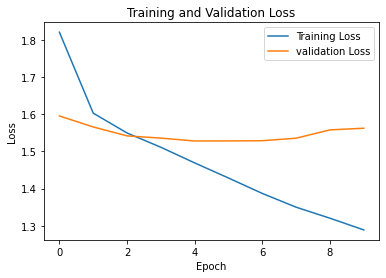

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

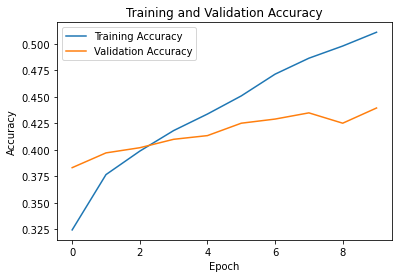

In [6]:
def plot_graph(result):
    # Models Loss graph
    plt.plot(result.history['loss'], label='Training Loss')
    plt.plot(result.history['val_loss'], label='validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Models accuracy graph
    plt.plot(result.history['accuracy'], label='Training Accuracy')
    plt.plot(result.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
plot_graph(result)